In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def frobNorm(m) :
    return np.sqrt(sum(m[i,j]*m[i,j] for i in range(len(m)) for j in range(len(m[0]))))

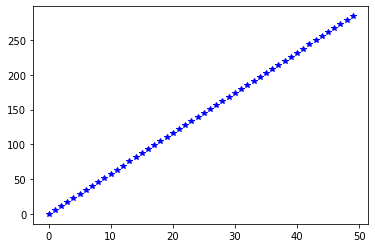

In [3]:
vals = np.zeros(500).reshape(10, 50)

for exp in range(10) :
    mat = np.random.rand(10, 10)
    for scalar in range(50):
        vals[exp, scalar] = frobNorm(scalar*mat)

yvals = np.mean(vals, axis=0)
plt.plot(np.arange(50), yvals, "b*")
    



In [4]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print (frobNorm(a))
print (np.linalg.norm(a))

print(np.mean(a, axis=0))

9.539392014169456
9.539392014169456
[2.5 3.5 4.5]


In [5]:
## Find scalar that brings Frobenius distance between two matrices to 1

def frobDistance(a, b):
    if (a.shape != b.shape) : raise Exception("oops")
    return frobNorm(a-b)

N = 7

a = np.random.rand(N, N)
b = np.random.rand(N, N)

s = 1
d = frobDistance(a, b)
print ("Initial d is ", d)
numIter = 0
while (d >  1) :
    numIter += 1
    s = 0.9 *s
    d = frobDistance(s*a, s*b)
    print (f"s is {s} and d is {d}")

print (numIter, s, frobDistance(s*a, s*b))

Initial d is  2.500502782353412
s is 0.9 and d is 2.2504525041180705
s is 0.81 and d is 2.0254072537062635
s is 0.7290000000000001 and d is 1.8228665283356376
s is 0.6561000000000001 and d is 1.6405798755020735
s is 0.5904900000000002 and d is 1.4765218879518665
s is 0.5314410000000002 and d is 1.3288696991566797
s is 0.47829690000000014 and d is 1.1959827292410117
s is 0.43046721000000016 and d is 1.0763844563169105
s is 0.38742048900000015 and d is 0.9687460106852196
9 0.38742048900000015 0.9687460106852196


In [7]:
a = np.random.rand(5, 3)
print (frobNorm(a))
print (np.linalg.norm(a))
print (np.sqrt((a@a.T).trace()))
print (np.sqrt((a.T@a).trace()))

1.6924157613803021
1.6924157613803021
1.6924157613803024
1.6924157613803024


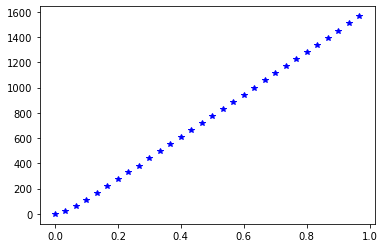

In [27]:
def cosineSim(a, b) :
    return np.dot(a, b)/(np.linalg.norm(a) * np.linalg.norm(b))

a = np.random.rand(10, 10)
anorm = np.linalg.norm(a)
xvals = np.arange(0, 1, 1/30)

normchangeper = np.zeros(len(xvals))
frobDist = np.zeros(len(xvals))
corrCoeff = np.zeros(len(xvals))

for i in range(len(xvals)) :
    shifted = a + i*np.eye(10, 10)
    shiftednorm = np.linalg.norm(shifted)
    
    frobDist[i] = frobDistance(shifted, a)
    corrCoeff[i] = cosineSim(a.flatten(), shifted.flatten())
    normchangeper[i] = 100*np.abs(shiftednorm - anorm)/anorm
    
plt.plot(xvals, normchangeper, 'b*')

    

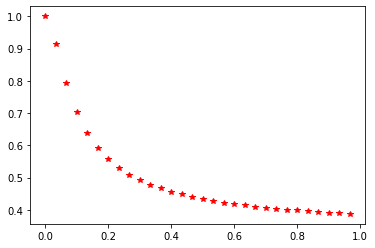

In [25]:
plt.plot(xvals, corrCoeff, 'r*')

    

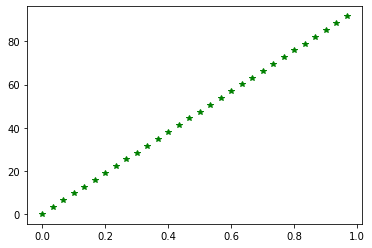

In [28]:
plt.plot(xvals, frobDist, 'g*')

In [30]:
def createMatrixOfRank(N, M, r) :
    return np.random.rand(N, r) @ np.random.rand(r, M)

In [36]:
m1 = createMatrixOfRank(5, 4, 3)
print (np.linalg.matrix_rank(m1))

3


In [52]:
rank0Mat = createMatrixOfRank(3, 3, 0)
rank1Mat = createMatrixOfRank(3, 3, 1)
rank2Mat = createMatrixOfRank(3, 3, 2)
rank3Mat = createMatrixOfRank(3, 3, 3)

##print (rank1Mat)

print (np.linalg.matrix_rank(rank3Mat + rank2Mat))
print (np.linalg.matrix_rank(rank3Mat @ rank0Mat))

3
0


In [58]:
rank3Mat = createMatrixOfRank(4, 5, 3)

print (np.linalg.matrix_rank(rank3Mat))
print (np.linalg.matrix_rank(rank3Mat.T))
print (np.linalg.matrix_rank(rank3Mat@rank3Mat.T))
print (np.linalg.matrix_rank(rank3Mat.T@rank3Mat))

3
3
3
3


In [77]:
rank3Mat = createMatrixOfRank(4, 4, 4)
vec = np.random.rand(4, 1)

## augment matrix with vec
augmented = np.hstack((rank3Mat, vec))
print (np.linalg.matrix_rank(augmented))

4


In [82]:
reducedRankMat = createMatrixOfRank(4, 4, 2)
print (np.linalg.det(reducedRankMat))

-2.800683516676051e-35
